Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))


New Delivery Times: [ 5 10]
Predicted Distances: [3058.50193109 3137.25516889]


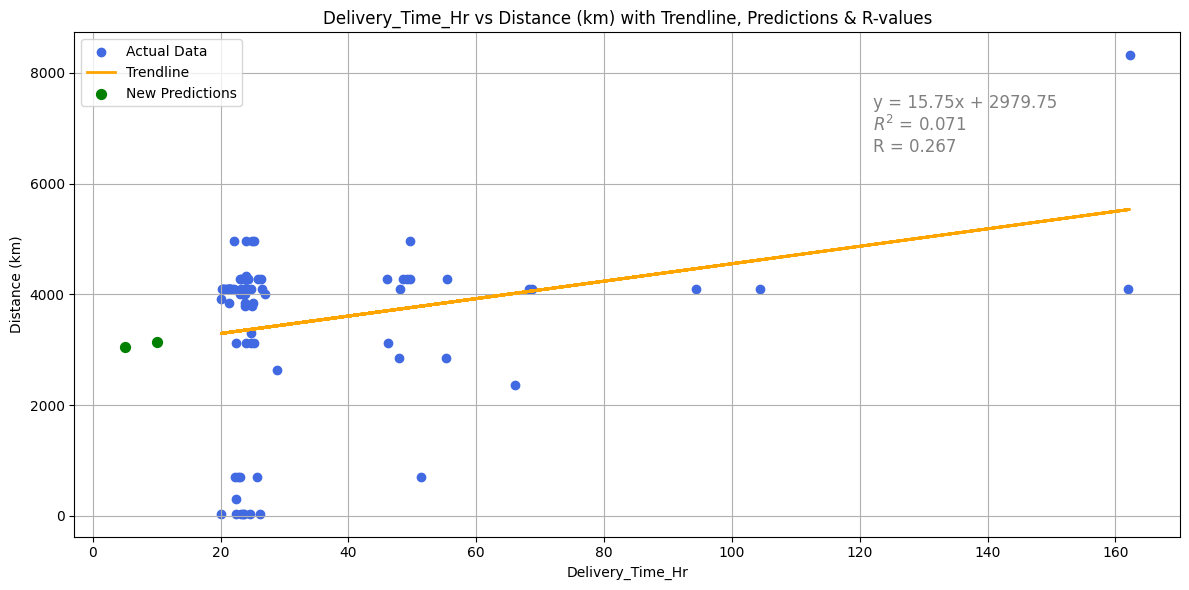

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Excel
file_path = '/content/drive/My Drive/Data_Anayltics/Simple Linear Regression_Outgoing Deliveries.xlsx'
df = pd.read_excel(file_path)

# X and y
X = df[['Delivery_Time_Hr']]
y = df['Distance (km)']

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# New predictions
# Numpy also applied to np.array
# (2) New Predictions
new_times = np.array([[5], [10]])
predicted_distances = model.predict(new_times)

print("New Delivery Times:", new_times.flatten())
print("Predicted Distances:", predicted_distances)

# Regression details (Coefficient R-Value)
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)
r_value = np.sqrt(r_squared)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='royalblue', label='Actual Data')
plt.plot(X, y_pred, color='orange', linewidth=2, label='Trendline')
plt.scatter(new_times, predicted_distances, color='green', s=50, label='New Predictions')

# Height Adjustment to the calculations and equations displayed in (Grey) Coordinates (+102,-1750)
eq_text = f'y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.3f}\nR = {r_value:.3f}'
plt.text(X.min() + 102, y.max() - 1750, eq_text, fontsize=12, color='grey')

plt.title('Delivery_Time_Hr vs Distance (km) with Trendline, Predictions & R-values')
plt.xlabel('Delivery_Time_Hr')
plt.ylabel('Distance (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
